<span style="background-color: lightgreen"><font size =6>NLP - Use Libs:</font></span>

<span style="background-color: lightgreen"><font size =5>Goals:</font></span> 
<br>`Summarize colleges: as if you are reading each one of them ... and summarize them` 
<br>`Compare colleges` 
<br>`Learn Python`

## First let's figure out which tools to use
`I am listing the tools below; explain the key ones`

In [4]:
import os 
import re 
import requests 
import numpy as np
import math
from bs4 import BeautifulSoup  
import pandas as pd 
from pathlib import Path
import nltk 
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from IPython.display import Image, display, Markdown
import matplotlib.pyplot as plt
from PIL import Image as img

import wikipedia
import wordcloud

**import requests**

*to visit a website url, it is take many many steps, although unseen to you. Most important part, the HTTP(or HTTPS s for secure*<br>
*requests tool or better say libary handles these: it can locate the url page and "download the content* <br>

**from bs4 import BeautifulSoup**

*Just to be clear, WHAT we see is not what we get*<br>
*we see beautiful pages, computers see lines lines of code* <br> 
*BeautifulSoup just do that. It gets its name 'tag soup' which is not good one* <br> 
 
**I will leave the others for now**

# Which collge you chose to research?
* we are going use wikipedia libray to find out how they summarize 

In [ ]:
!pip install wikipedia --upgrade

## UT, university of Toronto

* search for candidate pages

In [7]:
ut_candidate_pages = wikipedia.search("University of Toronto", results = 3)

In [8]:
ut_candidate_pages

['University of Toronto',
 'Toronto Metropolitan University',
 'University of Toronto Schools']

* looks like the first one
* `https://en.wikipedia.org/wiki/University_of_Toronto`

In [11]:
wiki_generated_summary = wikipedia.summary(ut_candidate_pages[0])  

## let's generate basic insights
* word cloud

In [13]:
wc = wordcloud.WordCloud().generate(wiki_generated_summary)

In [22]:
# wordcloud is generated from the frquence of the words. we need to remove frequent words

common_words = wordcloud.STOPWORDS
common_words.update(["College", "University", "Toronto", "Canada", "U", "Located"])

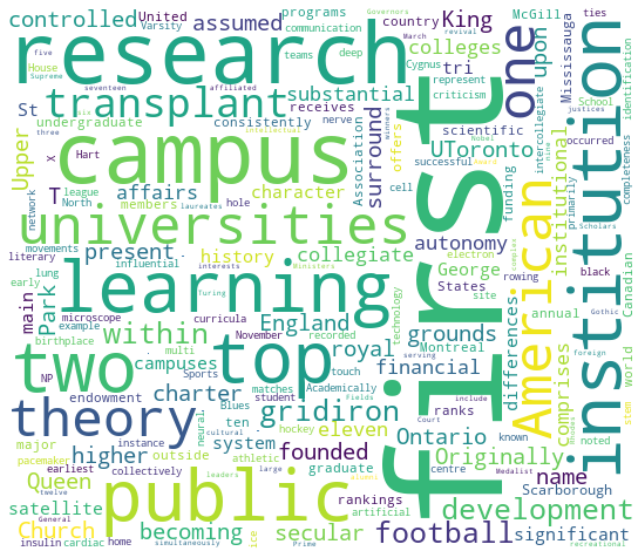

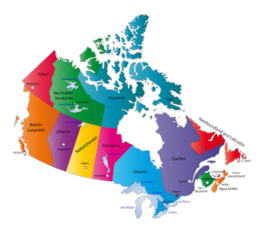

In [29]:
# generate the word cloud
# set fig size 
plt.figure( figsize=(20,10) )
png_mask = np.array(img.open(f"C:\SP\Teaching\gifs/canada-removebg-preview.png"))
#ucberkley_mask = np.array(img.open("c:/SP/aaaaa.png"))
h, w, _ = png_mask.shape 
# Create wordcloud
   

wc = wordcloud.WordCloud(background_color="white", stopwords=common_words, mask=ucberkley_mask, 
               contour_width=1, contour_color='steelblue'
).generate(wiki_generated_summary)

# show output
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(ucberkley_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

### there are more this lib can do. 
* check the images in the page

In [35]:
wikipedia.page(ut_candidate_pages[0]).images

['https://upload.wikimedia.org/wikipedia/commons/e/e3/AeroVelo_Atlas_top_view.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/a/a7/AirplaneInFrontOfUC.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/4/49/Doors_Unlocked_and_Open_May_2011.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/8/88/Flag_of_Ontario.svg',
 'https://upload.wikimedia.org/wikipedia/commons/1/1e/Frederick_Banting_3.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/e/ea/Harold_Innis_public-domain_library_archives-canada.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/6/64/John_Kenneth_Galbraith_1982.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/a/a8/John_charles_fields.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/a/ab/Julie_Payette_2017.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/f/f7/King%27s_College_royal_charter_1827_leaf1.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/a/a1/Lester_B._Pearson_with_a_pencil.jpg',
 'https://upload.wikimedia.org/wiki